In [57]:
# Load the CSV file
df = pd.read_csv("Documents/MonthlyPowerGeneration.csv")
df.index = df.index + 1 #Change index to start from 1
# Display the dataset
df

,Month,sum of actual energy generated
1,"May, 2008",7538.96
2,"June, 2008",7542.41
3,"July, 2008",7322.73
4,"August, 2008",7192.68
5,"September, 2008",7382.10
...,...,...
102,"November, 2016",11066.46
103,"December, 2016",11421.42
104,"January, 2017",11530.76
105,"February, 2017",10054.67


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
from statsmodels.tsa.seasonal import STL
import numpy as np

# Extract the series
y = df['sum of actual energy generated']

# Apply STL decomposition (monthly seasonality, period=12)
stl = STL(y, period=12)
result = stl.fit()

# Add components to DataFrame
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

# Calculate deseasonalized series
deseasonalized = y - result.seasonal

# Set first and last 6 values to NaN
half_period = 6  # for period=12
deseasonalized.iloc[:half_period] = np.nan
deseasonalized.iloc[-half_period:] = np.nan

# Add to DataFrame
df['deseasonalized'] = deseasonalized

df


,Month,sum of actual energy generated,trend,seasonal,residual,deseasonalized
1,"May, 2008",7538.96,7558.729424,82.576371,-102.345795,NaN
2,"June, 2008",7542.41,7589.085979,59.284598,-105.960577,NaN
3,"July, 2008",7322.73,7618.503611,-124.479616,-171.293994,NaN
4,"August, 2008",7192.68,7647.060307,-293.012271,-161.368036,NaN
5,"September, 2008",7382.10,7674.972951,-489.262266,196.389315,NaN
6,"October, 2008",7959.81,7702.581592,7.591128,249.637281,NaN
7,"November, 2008",7612.99,7730.200356,-560.534510,443.324154,8173.524510
8,"December, 2008",8060.76,7758.008466,112.449719,190.301815,7948.310281
9,"January, 2009",8001.35,7785.875667,295.102733,-79.628401,7706.247267
10,"February, 2009",7273.66,7813.220684,15.071045,-554.631729,7258.588955


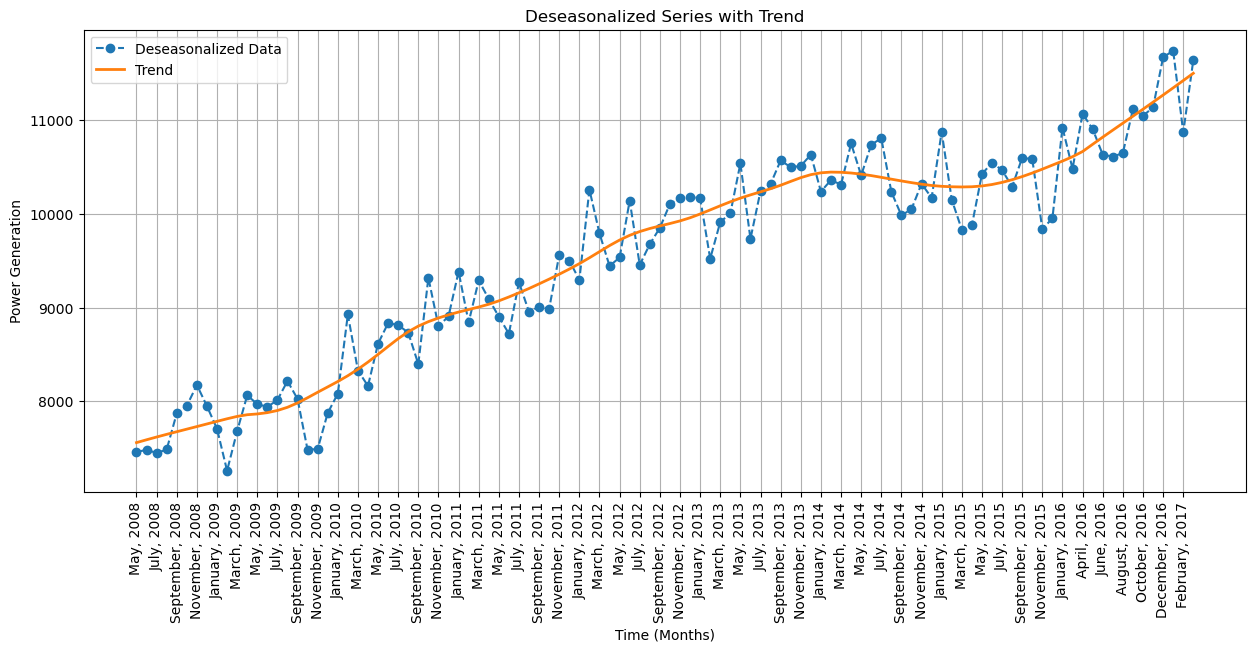

In [72]:
plt.figure(figsize=(15, 6))
plt.plot(df['Month'], df['deseasonalized'], label='Deseasonalized Data', linestyle='dashed', marker='o')
plt.plot(df['Month'], df['trend'], label='Trend', linewidth=2)

plt.xticks(df["Month"][::2], rotation=90)

plt.title('Deseasonalized Series with Trend')
plt.xlabel("Time (Months)")
plt.ylabel("Power Generation")

plt.legend()
plt.grid()
plt.show()

In [94]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'residual' column
result = adfuller(df['residual'], autolag='AIC')

# Print the results
print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of Lags Used:", adf_result[2])
print("Number of Observations:", adf_result[3])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.3f}")

ADF Test Statistic: -3.378489909284954
p-value: 0.011714373546740021
Number of Lags Used: 12
Number of Observations: 93
Critical Values:
   1%: -3.503
   5%: -2.893
   10%: -2.584


In [96]:
if adf_result[1] <= 0.05 and adf_result[0] <= adf_result[4]['5%']:
    print("Conclusion: Reject the null hypothesis. Series is stationary")
else:
    print("Conclusion: Fail to reject the null hypothesis. Series is non-stationary")


Conclusion: Reject the null hypothesis. Series is stationary


    Lag        Q  Chi-Square Critical (0.05)  Reject H0 (Q > χ²)
0     1   0.8458                      3.8415               False
1     2   4.4267                      5.9915               False
2     3   8.4700                      7.8147                True
3     4  10.7347                      9.4877                True
4     5  14.1398                     11.0705                True
5     6  14.2614                     12.5916                True
6     7  16.1362                     14.0671                True
7     8  17.3942                     15.5073                True
8     9  18.2262                     16.9190                True
9    10  18.2262                     18.3070               False
10   11  18.8855                     19.6751               False
11   12  38.1833                     21.0261                True
12   13  38.1885                     22.3620                True
13   14  41.2105                     23.6848                True
14   15  41.2319         

In [108]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on residuals
ljung_box_result = acorr_ljungbox(df['residual'].dropna(), lags=[20], return_df=True)

print(ljung_box_result)


      lb_stat  lb_pvalue
20  46.101396   0.000781


<Figure size 3500x600 with 0 Axes>

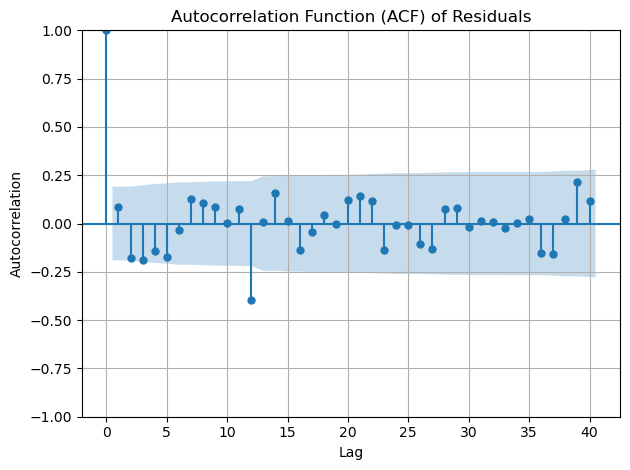

In [148]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF of residuals
plt.figure(figsize=(35, 6))
plot_acf(df['residual'].dropna(), lags=40)
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.grid()
plt.show()

    Lag      PACF  Test Statistic (ϕₖ×√n)  Significant at 5%
0     0  1.000000               10.295630               True
1     1  0.088075                0.906788              False
2     2 -0.189591               -1.951963              False
3     3 -0.162179               -1.669731              False
4     4 -0.155437               -1.600324              False
5     5 -0.239751               -2.468387               True
6     6 -0.124579               -1.282622              False
7     7 -0.016512               -0.170006              False
8     8 -0.039898               -0.410775              False
9     9  0.022442                0.231053              False
10   10 -0.023039               -0.237205              False
11   11  0.126958                1.307113              False
12   12 -0.408290               -4.203602               True
13   13  0.157071                1.617150              False
14   14  0.027549                0.283630              False
15   15 -0.122309       

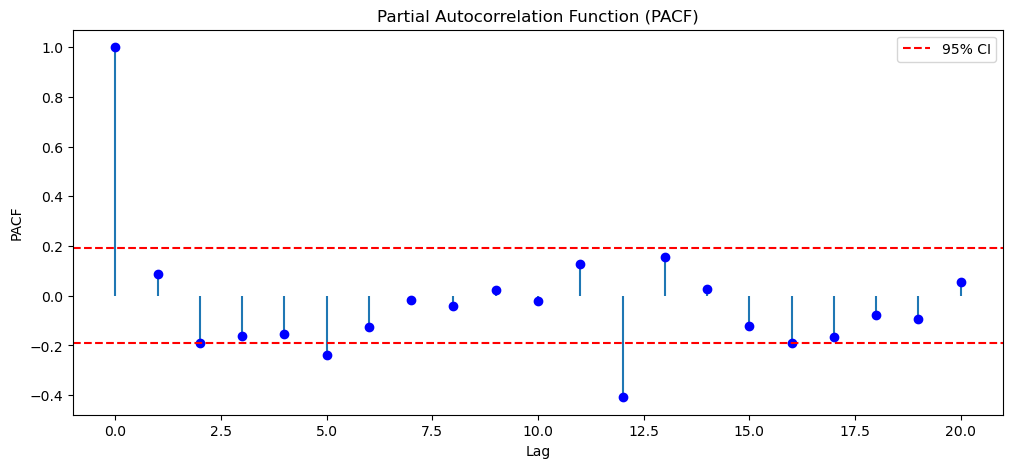

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# Get PACF values (adjust nlags as needed)
n = len(df['residual'])
pacf_vals = pacf(df['residual'], nlags=20, method='ywmle') 

# Compute test statistics: ϕₖ × √n
test_stats = pacf_vals * np.sqrt(n)

# Significance threshold for 95% confidence
critical_value = 1.96

# Store results in a DataFrame
pacf_test_df = pd.DataFrame({
    'Lag': range(len(pacf_vals)),
    'PACF': pacf_vals,
    'Test Statistic (ϕₖ×√n)': test_stats,
    'Significant at 5%': np.abs(test_stats) > critical_value
})

# Print table
print(pacf_test_df)

# Optional: Plot PACF with significance bands
plt.figure(figsize=(12, 5))
plt.stem(pacf_test_df['Lag'], pacf_test_df['PACF'], basefmt=" ", markerfmt='bo')
plt.axhline(y=critical_value / np.sqrt(n), linestyle='--', color='red', label='95% CI')
plt.axhline(y=-critical_value / np.sqrt(n), linestyle='--', color='red')
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.legend()
plt.show()